In [2]:
pwd

'/Users/daniellejenkins17/Documents/GitHub/Banknote-Classification-Project'

In [3]:
#UCI banknote authentication Data Set

import pandas as pd 
import numpy as np
import matplotlib as plt 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

df = pd.read_csv('/Users/daniellejenkins17/Downloads/data_banknote_authentication.txt', delimiter =',')

In [4]:
df

#1. variance of Wavelet Transformed image (continuous) 
#2. skewness of Wavelet Transformed image (continuous) 
#3. curtosis of Wavelet Transformed image (continuous) 
#4. entropy of image (continuous) 
#5. class (integer) 

#In the Banknote Authentication dataset, class 0 is “genuine/authentic” and class 1 is “forgery/fake”

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
df.info

<bound method DataFrame.info of        3.6216    8.6661  -2.8073  -0.44699  0
0     4.54590   8.16740  -2.4586  -1.46210  0
1     3.86600  -2.63830   1.9242   0.10645  0
2     3.45660   9.52280  -4.0112  -3.59440  0
3     0.32924  -4.45520   4.5718  -0.98880  0
4     4.36840   9.67180  -3.9606  -3.16250  0
...       ...       ...      ...       ... ..
1366  0.40614   1.34920  -1.4501  -0.55949  1
1367 -1.38870  -4.87730   6.4774   0.34179  1
1368 -3.75030 -13.45860  17.5932  -2.77710  1
1369 -3.56370  -8.38270  12.3930  -1.28230  1
1370 -2.54190  -0.65804   2.6842   1.19520  1

[1371 rows x 5 columns]>

In [6]:
df.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [7]:
df.mean()

3.6216      0.431410
8.6661      1.917434
-2.8073     1.400694
-0.44699   -1.192200
0           0.444931
dtype: float64

In [8]:
df.median()

3.6216      0.49571
8.6661      2.31340
-2.8073     0.61663
-0.44699   -0.58665
0           0.00000
dtype: float64

In [9]:
#renaming columns 

df.columns = ['Variance', 'Skewness', "Kurtosis", "Entropy", "Authentic_Fake"]
df

,Variance,Skewness,Kurtosis,Entropy,Authentic_Fake
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [10]:
#Tasks: 

#Train test split 

#make plots of visualizations: 

#Class vs Variance 
#Class vs Skewness 
#Class vs Kurtosis
#Class vs Entropy 

#read the lab notes and take notes
#make notes in EN from my black notebook from today 

In [30]:
df.Authentic_Fake.value_counts()

0    761
1    610
Name: Authentic_Fake, dtype: int64

In [16]:
df.Authentic_Fake.value_counts(normalize = True)

0    0.555069
1    0.444931
Name: Authentic_Fake, dtype: float64

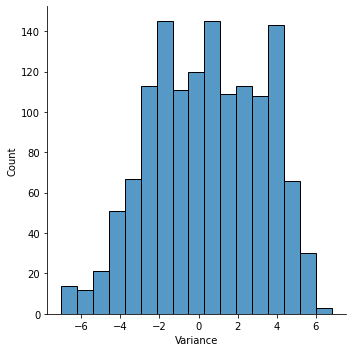

In [20]:
sns.displot(df['Variance'])

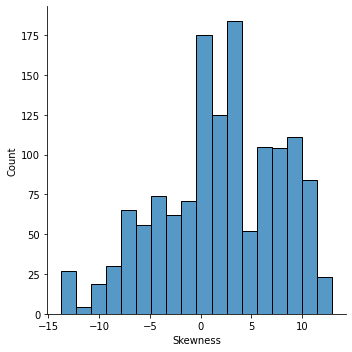

In [18]:
sns.displot(df['Skewness'])

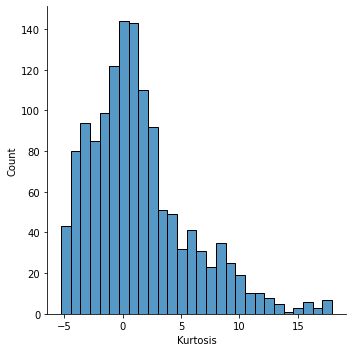

In [21]:
sns.displot(df['Kurtosis'])

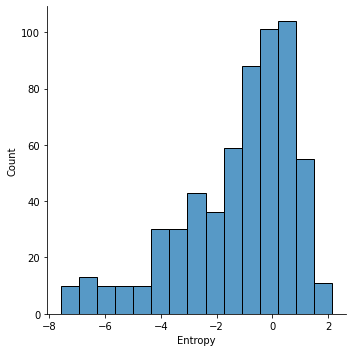

In [29]:
sns.displot(df[df['Authentic_Fake'] == 1]['Entropy'])

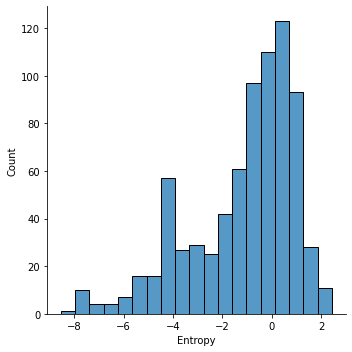

In [28]:
sns.displot(df[df['Authentic_Fake'] == 0]['Entropy'])

<AxesSubplot:xlabel='Entropy', ylabel='Kurtosis'>

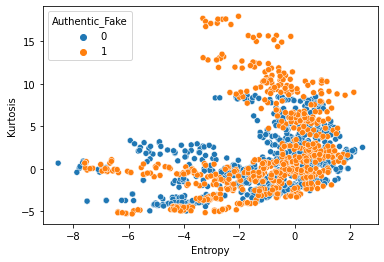

In [27]:
sns.scatterplot(data = df, x = 'Entropy', y = 'Kurtosis', hue = 'Authentic_Fake')

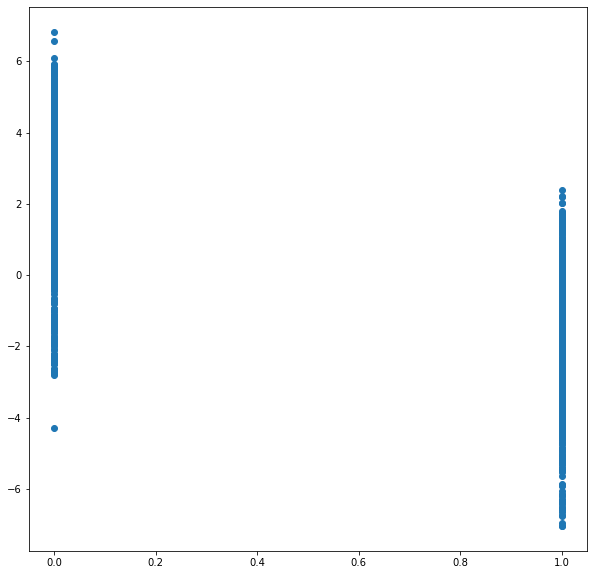

In [12]:
plt.figure(figsize=(10, 10))
plt.scatter(df.Authentic_Fake,df.Variance)
plt.show()

#0 is Geniune and 1 is Fake 

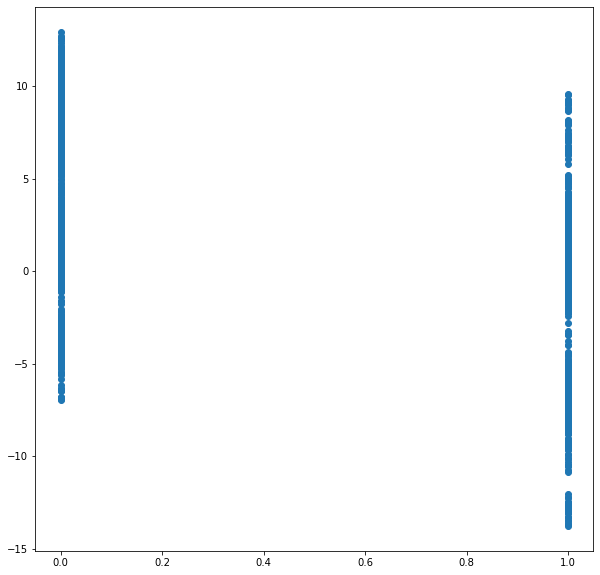

In [13]:
plt.figure(figsize=(10, 10))
plt.scatter(df.Authentic_Fake,df.Skewness)
plt.show()

#0 is Geniune and 1 is Fake 

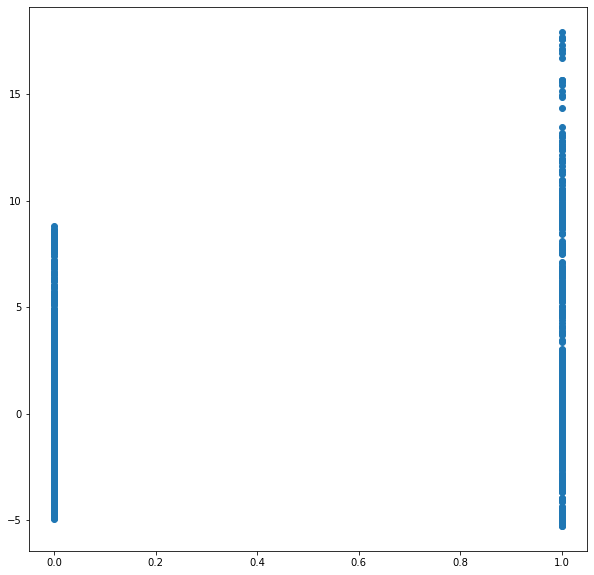

In [14]:
plt.figure(figsize=(10, 10))
plt.scatter(df.Authentic_Fake,df.Kurtosis)
plt.show()

#0 is Geniune and 1 is Fake 

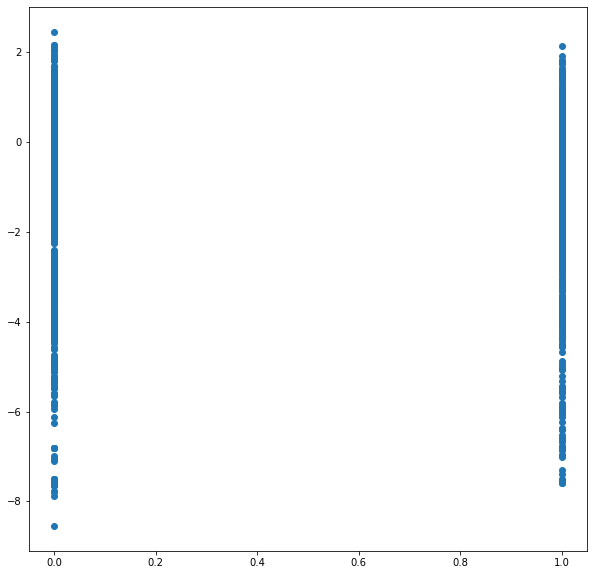

In [15]:
plt.figure(figsize=(10, 10))
plt.scatter(df.Authentic_Fake,df.Entropy)
plt.show()

#0 is Geniune and 1 is Fake 